In [2]:
import pandas as pd 
import numpy as np 
!pip install yfinance
import yfinance as yf

import statsmodels.api as sm
import datetime as dt
from pandas_datareader import data
import seaborn as sns
import scipy.stats as scs
import scipy.optimize as sco
%matplotlib inline
%precision 4

'%.4f'

In [3]:
#Part A)a

In [4]:
tickers = ['FBCVX', 'FSMVX', 'FCPVX', 'FBGRX', 'FMCSX', 'FCPGX', 'FFRHX', 'FBNDX', 'FRIFX', '^SPGSCI']

In [5]:
data_stocks = yf.download(tickers, start = '2004-12-31', end = '2021-12-31' )['Adj Close']
data_stocks

[*********************100%***********************]  10 of 10 completed


,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
Date,,,,,,,,,,
2004-12-30,8.690969,19.396994,4.090903,4.301602,3.502706,4.571139,7.470833,4.075144,6.351932,310.660004
2004-12-31,8.677139,19.355234,4.111654,4.294075,3.505847,4.586764,7.464465,4.082063,6.343093,310.470001
2005-01-03,8.594171,19.220657,4.111654,4.222569,3.443019,4.586764,7.346690,4.078604,6.259106,304.190002
2005-01-04,8.490459,18.965431,4.100732,4.154828,3.405321,4.586764,7.206633,4.068225,6.179542,308.799988
2005-01-05,8.442060,18.891184,4.100732,4.109667,3.345633,4.586764,7.158884,4.047470,6.113237,306.250000
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,23.433374,183.179901,8.160028,31.590000,20.141624,9.039128,39.374557,12.896316,26.372793,558.349976
2021-12-27,23.647646,185.747147,8.169787,31.920000,20.423985,9.039128,39.839462,12.953044,26.763897,566.530029
2021-12-28,23.735302,184.085403,8.169787,31.690001,20.437206,9.039128,39.915363,12.981408,26.817228,566.179993


In [6]:
start=dt.date(2004,12,31)
end=dt.date(2021,12,31)
factors = data.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0]
factors=factors[1:]
factors=factors/100
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2005-01,-0.0276,-0.0172,0.0206,0.0016
2005-02,0.0189,-0.0057,0.0153,0.0016
2005-03,-0.0197,-0.0140,0.0204,0.0021
2005-04,-0.0261,-0.0393,0.0006,0.0021
2005-05,0.0365,0.0289,-0.0064,0.0024
...,...,...,...,...
2021-08,0.0291,-0.0043,-0.0016,0.0000
2021-09,-0.0437,0.0072,0.0508,0.0000
2021-10,0.0665,-0.0235,-0.0048,0.0000


In [7]:
data_stocks = data_stocks.resample('M').last()
data_stocks

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
Date,,,,,,,,,,
2004-12-31,8.677139,19.355234,4.111654,4.294075,3.505847,4.586764,7.464465,4.082063,6.343093,310.470001
2005-01-31,8.587256,18.844786,4.139532,4.335472,3.486999,4.601981,7.222548,4.061306,6.250268,331.480011
2005-02-28,8.877645,18.932955,4.117616,4.433322,3.659778,4.624617,7.372152,4.078604,6.471280,355.850006
2005-03-31,8.642567,18.584919,4.097375,4.388160,3.590665,4.626520,7.197082,4.036827,6.321944,383.619995
2005-04-30,8.379837,18.218323,4.143092,4.072032,3.414746,4.623773,6.866036,4.092460,6.083295,353.690002
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,22.776329,178.957840,8.240705,33.083569,19.454531,8.939493,38.134682,12.745641,25.768810,527.369995
2021-09-30,21.952307,170.819351,8.173665,31.711632,19.326490,9.000094,37.133747,12.544580,24.707535,557.710022
2021-10-31,23.017014,183.996262,8.174653,33.468563,20.074024,9.052341,38.892143,12.796778,25.926685,588.210022


In [8]:
data_stocks = np.log(data_stocks/data_stocks.shift(1))

#μετατρέπω τα δεδομένα μου σε συνεχή

data_stocks.dropna(axis = 0, inplace = True)
data_stocks

#αφαιρώ την πρώτη γραμμή η οποία είναι μη-αριθμός

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
Date,,,,,,,,,,
2005-01-31,-0.010413,-0.026727,0.006757,0.009594,-0.005391,0.003312,-0.032946,-0.005098,-0.014742,0.065480
2005-02-28,0.033257,0.004668,-0.005308,0.022319,0.048361,0.004907,0.020502,0.004250,0.034750,0.070942
2005-03-31,-0.026837,-0.018554,-0.004928,-0.010239,-0.019065,0.000412,-0.024034,-0.010296,-0.023347,0.075143
2005-04-30,-0.030871,-0.019923,0.011096,-0.074768,-0.050234,-0.000594,-0.047089,0.013687,-0.038480,-0.081232
2005-05-31,0.029270,0.042634,0.011022,0.054845,0.047606,0.003636,0.065494,0.014340,0.045578,0.003387
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.024788,0.042282,-0.002354,0.059002,0.032356,0.007000,0.021511,0.011765,0.031463,-0.025757
2021-09-30,-0.036850,-0.046544,-0.008169,-0.042353,-0.006603,0.006756,-0.026598,-0.015901,-0.042057,0.055937
2021-10-31,0.047361,0.074309,0.000121,0.053923,0.037950,0.005788,0.046266,0.019905,0.048165,0.053245


In [9]:
##Part A)b

In [10]:
data_stocks.index=factors.index
data_stocks

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
Date,,,,,,,,,,
2005-01,-0.010413,-0.026727,0.006757,0.009594,-0.005391,0.003312,-0.032946,-0.005098,-0.014742,0.065480
2005-02,0.033257,0.004668,-0.005308,0.022319,0.048361,0.004907,0.020502,0.004250,0.034750,0.070942
2005-03,-0.026837,-0.018554,-0.004928,-0.010239,-0.019065,0.000412,-0.024034,-0.010296,-0.023347,0.075143
2005-04,-0.030871,-0.019923,0.011096,-0.074768,-0.050234,-0.000594,-0.047089,0.013687,-0.038480,-0.081232
2005-05,0.029270,0.042634,0.011022,0.054845,0.047606,0.003636,0.065494,0.014340,0.045578,0.003387
...,...,...,...,...,...,...,...,...,...,...
2021-08,0.024788,0.042282,-0.002354,0.059002,0.032356,0.007000,0.021511,0.011765,0.031463,-0.025757
2021-09,-0.036850,-0.046544,-0.008169,-0.042353,-0.006603,0.006756,-0.026598,-0.015901,-0.042057,0.055937
2021-10,0.047361,0.074309,0.000121,0.053923,0.037950,0.005788,0.046266,0.019905,0.048165,0.053245


In [11]:
Description = data_stocks.describe()
Description

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.004943,0.011037,0.003366,0.009810,0.008624,0.003325,0.008221,0.005689,0.007074,0.002961
std,0.048655,0.048964,0.010285,0.055429,0.055825,0.017044,0.053879,0.032300,0.053136,0.070142
min,-0.217292,-0.208099,-0.054121,-0.268970,-0.260143,-0.125322,-0.277576,-0.281305,-0.244484,-0.338382
25%,-0.018707,-0.013969,-0.002862,-0.012939,-0.017504,0.000410,-0.011387,-0.001954,-0.013430,-0.027714
50%,0.013047,0.014264,0.003262,0.015419,0.014669,0.004199,0.014319,0.007918,0.012710,0.012127
75%,0.033353,0.041983,0.011013,0.044435,0.041088,0.007646,0.037145,0.018728,0.037714,0.046376
max,0.123725,0.157342,0.032244,0.149070,0.181814,0.063286,0.124496,0.110825,0.157320,0.191459


<AxesSubplot:xlabel='Date'>

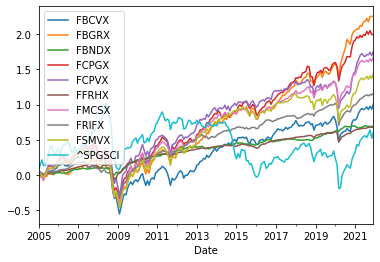

In [12]:
import matplotlib
data_stocks.cumsum().plot()

In [13]:
##Part A)c

In [14]:
mean_data_stocks = data_stocks.mean()*12
mean_data_stocks

FBCVX      0.059313
FBGRX      0.132439
FBNDX      0.040389
FCPGX      0.117723
FCPVX      0.103484
FFRHX      0.039905
FMCSX      0.098652
FRIFX      0.068268
FSMVX      0.084883
^SPGSCI    0.035528
dtype: float64

In [15]:
std_data_stocks = data_stocks.std() * np.sqrt(12)
std_data_stocks

FBCVX      0.168546
FBGRX      0.169615
FBNDX      0.035629
FCPGX      0.192010
FCPVX      0.193382
FFRHX      0.059043
FMCSX      0.186642
FRIFX      0.111890
FSMVX      0.184067
^SPGSCI    0.242978
dtype: float64

In [16]:
var_data_stocks = data_stocks.var()*12
var_data_stocks

FBCVX      0.028408
FBGRX      0.028769
FBNDX      0.001269
FCPGX      0.036868
FCPVX      0.037397
FFRHX      0.003486
FMCSX      0.034835
FRIFX      0.012519
FSMVX      0.033881
^SPGSCI    0.059038
dtype: float64

In [17]:
cov_data_stocks = data_stocks.cov()*12
cov_data_stocks

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
FBCVX,0.028408,0.024469,0.001542,0.027906,0.029632,0.006544,0.029137,0.013884,0.029526,0.022883
FBGRX,0.024469,0.028769,0.001907,0.029270,0.026240,0.006276,0.027499,0.012555,0.026564,0.020965
FBNDX,0.001542,0.001907,0.001269,0.002031,0.001362,0.000882,0.002257,0.002198,0.001871,0.001671
FCPGX,0.027906,0.029270,0.002031,0.036868,0.032458,0.007727,0.032888,0.015052,0.031197,0.026698
FCPVX,0.029632,0.026240,0.001362,0.032458,0.037397,0.007368,0.032244,0.016023,0.033452,0.024611
FFRHX,0.006544,0.006276,0.000882,0.007727,0.007368,0.003486,0.008072,0.005500,0.007586,0.008625
FMCSX,0.029137,0.027499,0.002257,0.032888,0.032244,0.008072,0.034835,0.016051,0.032550,0.028395
FRIFX,0.013884,0.012555,0.002198,0.015052,0.016023,0.005500,0.016051,0.012519,0.016191,0.013959
FSMVX,0.029526,0.026564,0.001871,0.031197,0.033452,0.007586,0.032550,0.016191,0.033881,0.025311
^SPGSCI,0.022883,0.020965,0.001671,0.026698,0.024611,0.008625,0.028395,0.013959,0.025311,0.059038


In [18]:
cor_data_stocks = data_stocks.corr()
cor_data_stocks


,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
FBCVX,1.000000,0.855928,0.256737,0.862298,0.909125,0.657571,0.926220,0.736211,0.951727,0.558752
FBGRX,0.855928,1.000000,0.315554,0.898734,0.799977,0.626655,0.868638,0.661554,0.850837,0.508695
FBNDX,0.256737,0.315554,1.000000,0.296874,0.197665,0.419398,0.339471,0.551463,0.285253,0.193034
FCPGX,0.862298,0.898734,0.296874,1.000000,0.874147,0.681570,0.917703,0.700619,0.882692,0.572257
FCPVX,0.909125,0.799977,0.197665,0.874147,1.000000,0.645317,0.893352,0.740510,0.939774,0.523782
FFRHX,0.657571,0.626655,0.419398,0.681570,0.645317,1.000000,0.732491,0.832566,0.698053,0.601231
FMCSX,0.926220,0.868638,0.339471,0.917703,0.893352,0.732491,1.000000,0.768585,0.947475,0.626131
FRIFX,0.736211,0.661554,0.551463,0.700619,0.740510,0.832566,0.768585,1.000000,0.786169,0.513429
FSMVX,0.951727,0.850837,0.285253,0.882692,0.939774,0.698053,0.947475,0.786169,1.000000,0.565935
^SPGSCI,0.558752,0.508695,0.193034,0.572257,0.523782,0.601231,0.626131,0.513429,0.565935,1.000000


In [19]:
##Part A)d

In [20]:
noa = len(tickers)
mport = []
stdport = []
for i in range(10000):
    weights = np.random.uniform(-1, 1, noa)
    if np.sum(weights) <= 0:
        continue
    weights /= np.sum(weights)
    varport = weights@cov_data_stocks@weights.T
    if varport < 0:
        continue 
    mport.append(weights@mean_data_stocks)
    stdport.append(np.sqrt(varport))
    
mport = np.array(mport)
stdport = np.array(stdport)

def fun_stdport(weights):
    varport = weights@cov_data_stocks@weights.T
    return np.sqrt(varport)

w0 = noa*[1/noa,]

consmin = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1})
opts_min = sco.minimize(fun_stdport, w0, method = 'SLSQP', constraints = consmin, options = {'disp': True})
print(opts_min.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.02511101869942486
            Iterations: 16
            Function evaluations: 178
            Gradient evaluations: 16
[ 0.0751 -0.0064  0.8025 -0.0398  0.1182  0.5107 -0.1369 -0.3306  0.0139
 -0.0067]


In [21]:
##Part A)e

mport_min = opts_min.x@mean_data_stocks
stdport_min = opts_min.fun
mport_eff = np.linspace(mport_min, 1, 500)
stdport_eff = []

for mp in mport_eff:
    cons=({'type':'eq','fun':lambda x: np.sum(x)-1},{'type':'eq','fun':lambda x: x@mean_data_stocks-mp})
    opts = sco.minimize(fun_stdport, w0, method = 'SLSQP', constraints = cons)
    stdport_eff.append(opts.fun)
stdport_eff = np.array(stdport_eff)
mport_noteff=np.linspace(-1,mport_min,500)
stdport_noteff=[]

for mp in mport_noteff:
    cons=({'type':'eq','fun':lambda x: np.sum(x)-1},{'type':'eq','fun':lambda x: x@mean_data_stocks-mp})
    opts = sco.minimize(fun_stdport,w0,method='SLSQP',constraints=cons)
    stdport_noteff.append(opts.fun)
stdport_noteff = np.array(stdport_noteff)


In [22]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'To σύνολο των επενδυτικών δυνατοτήτων ελάχιστου κινδύνου')

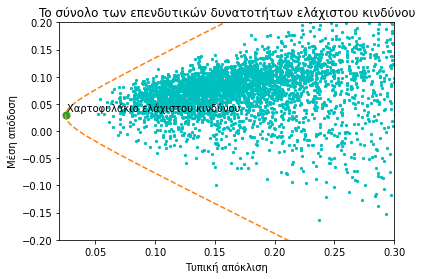

In [23]:
stdport_full=np.concatenate((stdport_noteff,stdport_eff))
mport_full=np.concatenate((mport_noteff,mport_eff))

plt.scatter(stdport,mport,color='c',s=5)
plt.plot(stdport_full,mport_full,color='C1',linestyle='--')
plt.scatter(stdport_min,mport_min,color='C2',marker='o',s=50)
plt.annotate('Χαρτοφυλάκιο ελάχιστου κινδύνου', xy = (stdport_min+0.001, mport_min+0.008))
plt.xlim(0.02,0.3)
plt.ylim(-0.2,0.2)
plt.xlabel('Τυπική απόκλιση')
plt.ylabel('Μέση απόδοση')
plt.title('To σύνολο των επενδυτικών δυνατοτήτων ελάχιστου κινδύνου')

In [24]:
##Part A)f

rf=factors['RF'].mean()
rf

0.0010

In [25]:
def fun_Sharpe(weights):
    mport = weights @ mean_data_stocks
    varport = weights @cov_data_stocks@weights.T
    sdport = np.sqrt(varport)
    return -(mport - rf)/sdport

opts_maxshape = sco.minimize(fun_Sharpe, w0, method = 'SLSQP', constraints = consmin, options = {'disp':True})


mport_tangent = opts_maxshape.x @ mean_data_stocks
display(mport_tangent)
stdport_tangent = fun_stdport(opts_maxshape.x)
display(stdport_tangent)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.5530439000399054
            Iterations: 18
            Function evaluations: 207
            Gradient evaluations: 18


0.05593962302950251

0.03540353912665966

Text(0.5, 1.0, 'Το αποτελεσματικό σύνορο και η γραμμή κατανομής του κεφαλαίου')

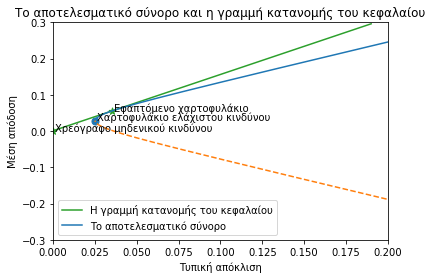

In [26]:
##Part A)g

sc=np.arange(0,0.2,0.01)
Sharpe=(mport_tangent-rf)/stdport_tangent
mc=rf+Sharpe*sc
plt.plot(sc,mc,color='C2',label='Η γραμμή κατανομής του κεφαλαίου')
plt.plot(stdport_eff,mport_eff,color='C0',label='Το αποτελεσματικό σύνορο')
plt.plot(stdport_noteff,mport_noteff,color='C1',linestyle='--')
plt.scatter(stdport_min,mport_min,color='C0',marker='o',s=50)
plt.scatter((0,stdport_tangent),(rf,mport_tangent),color='C2',marker='*',s=50)
plt.annotate('Χαρτοφυλάκιο ελάχιστου κινδύνου', xy = (stdport_min+0.001, mport_min))
plt.annotate('Εφαπτόμενο χαρτοφυλάκιο', xy = (stdport_tangent+0.001, mport_tangent))
plt.annotate('Χρεόγραφο μηδενικού κινδύνου', xy = (0.001, rf))
plt.xlim(0,0.2)
plt.ylim(-0.3,0.3)
plt.legend()
plt.xlabel('Τυπική απόκλιση')
plt.ylabel('Μέση απόδοση')
plt.title('Το αποτελεσματικό σύνορο και η γραμμή κατανομής του κεφαλαίου')


In [27]:
##Part B)a

wzero = 0.4
wport = 0.6

##Part B)b

portfolio_data = wport*(data_stocks.values@opts_maxshape.x.T) + (wzero*factors['RF'].values)
min_portfolio_data = data_stocks.values@opts_min.x
portfolio_data = np.hstack((portfolio_data.reshape(-1,1), min_portfolio_data.reshape(-1,1)))

portfolio_data = pd.DataFrame(portfolio_data, index = data_stocks.index, columns = ['Big_Portfolio', 'Minimum_Variance_Portfolio'])
portfolio_data.describe()

,Big_Portfolio,Minimum_Variance_Portfolio
count,204.000000,204.000000
mean,0.003180,0.002401
std,0.006099,0.007249
min,-0.024355,-0.033083
25%,-0.000122,-0.002062
50%,0.002618,0.002349
75%,0.006979,0.007031
max,0.022452,0.025551


<AxesSubplot:xlabel='Date'>

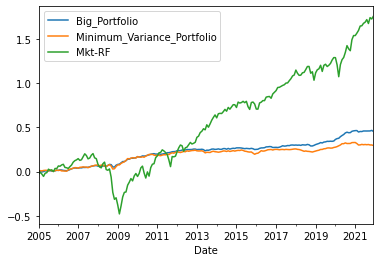

In [28]:
##Part B)c
P_RF = portfolio_data-rf 
P_RF['Mkt-RF'] = factors['Mkt-RF']
P_RF.cumsum().plot()


In [29]:
##Part B)d

In [30]:
portfolio_data.index = factors.index
merge_data = pd.merge(portfolio_data, factors, on = 'Date')

In [31]:
merge_data['Big_Portfolio-RF'] = merge_data.Big_Portfolio - merge_data.RF
merge_data['Minimum_Variance_Portfolio-RF'] = merge_data.Minimum_Variance_Portfolio - merge_data.RF
merge_data

,Big_Portfolio,Minimum_Variance_Portfolio,Mkt-RF,SMB,HML,RF,Big_Portfolio-RF,Minimum_Variance_Portfolio-RF
Date,,,,,,,,
2005-01,0.001652,0.011038,-0.0276,-0.0172,0.0206,0.0016,0.000052,0.009438
2005-02,-0.002000,0.001340,0.0189,-0.0057,0.0153,0.0016,-0.003600,-0.000260
2005-03,-0.001331,-0.001618,-0.0197,-0.0140,0.0204,0.0021,-0.003431,-0.003718
2005-04,0.005931,0.005376,-0.0261,-0.0393,0.0006,0.0021,0.003831,0.003276
2005-05,0.008788,0.002976,0.0365,0.0289,-0.0064,0.0024,0.006388,0.000576
...,...,...,...,...,...,...,...,...
2021-08,0.001398,-0.001471,0.0291,-0.0043,-0.0016,0.0000,0.001398,-0.001471
2021-09,0.000825,0.003270,-0.0437,0.0072,0.0508,0.0000,0.000825,0.003270
2021-10,0.001727,-0.004124,0.0665,-0.0235,-0.0048,0.0000,0.001727,-0.004124


In [32]:
#Εκτίμηση του δέικτη Jensen's alpha για Big_Portfolio

Y = merge_data['Big_Portfolio-RF']
X = merge_data['Mkt-RF']
Xc = sm.add_constant(X)
model_Portfolio_JA_index = sm.OLS(Y, Xc)
modelfit_Portfolio_JA_index = model_Portfolio_JA_index.fit()
modelfit_Portfolio_JA_index.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Big_Portfolio-RF   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     36.98
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           5.86e-09
Time:                        10:15:13   Log-Likelihood:                 762.99
No. Observations:                 204   AIC:                            -1522.
Df Residuals:                     202   BIC:                            -1515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.000      4.215      0.000       0.001       0.003
Mkt-RF         0.0565      0.009      6.081      0.000       0.038       0.075
==============================================================================
Omnibus:                        5.828   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                8.749
Skew:                           0.059   Prob(JB):                       0.0126
Kurtosis:                       4.008   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
##Εκτίμηση του δείκτη FF για Big_Portfolio

Y = merge_data['Big_Portfolio-RF']
X = merge_data[['Mkt-RF', 'SMB', 'HML']]
Xc = sm.add_constant(X)
model_Portfolio_FF_index = sm.OLS(Y, Xc)
modelfit_Portfolio_FF_index = model_Portfolio_FF_index.fit()
modelfit_Portfolio_FF_index.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Big_Portfolio-RF   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     24.44
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.61e-13
Time:                        10:15:17   Log-Likelihood:                 777.70
No. Observations:                 204   AIC:                            -1547.
Df Residuals:                     200   BIC:                            -1534.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.000      4.000      0.000       0.001       0.002
Mkt-RF         0.0611      0.009      6.442      0.000       0.042       0.080
SMB            0.0352      0.017      2.078      0.039       0.002       0.069
HML           -0.0707      0.013     -5.323      0.000      -0.097      -0.044
==============================================================================
Omnibus:                        6.322   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                7.583
Skew:                           0.237   Prob(JB):                       0.0226
Kurtosis:                       3.817   Cond. No.                         46.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#Εκτίμηση του δείκτη Jensen's alpha Minimum_Variance_Portfolio

Y = merge_data['Minimum_Variance_Portfolio-RF']
X = merge_data['Mkt-RF']
Xc = sm.add_constant(X)
model_Min_JA_index = sm.OLS(Y, Xc)
modelfit_Min_JA_index = model_Min_JA_index.fit()
modelfit_Min_JA_index.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Minimum_Variance_Portfolio-RF   R-squared:                       0.033
Model:                                       OLS   Adj. R-squared:                  0.028
Method:                            Least Squares   F-statistic:                     6.916
Date:                           Wed, 11 Jan 2023   Prob (F-statistic):            0.00920
Time:                                   10:15:21   Log-Likelihood:                 716.58
No. Observations:                            204   AIC:                            -1429.
Df Residuals:                                202   BIC:                            -1423.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      2.282      0.024       0.000       0.002
Mkt-RF         0.0307      0.012      2.630      0.009       0.008       0.054
==============================================================================
Omnibus:                       10.052   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               21.463
Skew:                           0.055   Prob(JB):                     2.18e-05
Kurtosis:                       4.585   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Εκτίμηση του δείκτη FF alpha Minimum_Variance_Portfolio

Y = merge_data['Minimum_Variance_Portfolio-RF']
X = merge_data[['Mkt-RF', 'SMB', 'HML']]
Xc = sm.add_constant(X)
model_Min_FF_index = sm.OLS(Y, Xc)
modelfit_Min_FF_index = model_Min_FF_index.fit()
modelfit_Min_FF_index.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Minimum_Variance_Portfolio-RF   R-squared:                       0.052
Model:                                       OLS   Adj. R-squared:                  0.038
Method:                            Least Squares   F-statistic:                     3.661
Date:                           Wed, 11 Jan 2023   Prob (F-statistic):             0.0133
Time:                                   10:15:23   Log-Likelihood:                 718.60
No. Observations:                            204   AIC:                            -1429.
Df Residuals:                                200   BIC:                            -1416.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      2.066      0.040    4.87e-05       0.002
Mkt-RF         0.0405      0.013      3.191      0.002       0.015       0.065
SMB           -0.0286      0.023     -1.264      0.208      -0.073       0.016
HML           -0.0256      0.018     -1.440      0.151      -0.061       0.009
==============================================================================
Omnibus:                       11.062   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.401
Skew:                           0.146   Prob(JB):                     8.29e-06
Kurtosis:                       4.633   Cond. No.                         46.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
##Sharpe Ratio

Sharpe_market=merge_data['Mkt-RF'].mean()/merge_data['Mkt-RF'].std()
Sharpe_Big_Portfolio=merge_data['Big_Portfolio-RF'].mean()/merge_data['Big_Portfolio'].std()
Sharpe_Minimum_Variance_Portfolio=merge_data['Minimum_Variance_Portfolio-RF'].mean()/merge_data['Minimum_Variance_Portfolio'].std()
Sharpe_market,Sharpe_Big_Portfolio,Sharpe_Minimum_Variance_Portfolio


(0.1971, 0.3645, 0.1993)

In [37]:
##M Square

Msq_Big_Portfolio=merge_data['Mkt-RF'].std()*(Sharpe_Big_Portfolio-Sharpe_market)
Msq_Minimum_Variance_Portfolio=merge_data['Mkt-RF'].std()*(Sharpe_Minimum_Variance_Portfolio-Sharpe_market)
Msq_Big_Portfolio, Msq_Minimum_Variance_Portfolio

(0.0073, 0.0001)

In [38]:
##Information Ratio

alpha_Big_Portfolio=modelfit_Portfolio_JA_index.params['const']
unsyst_risk_Big_Portfolio=modelfit_Portfolio_JA_index.resid.std()
Inf_Big_Portfolio=alpha_Big_Portfolio/unsyst_risk_Big_Portfolio

alpha_Minimum_Variance_Portfolio=modelfit_Min_JA_index.params['const']
unsyst_risk_Minimum_Variance_Portfolio=modelfit_Min_JA_index.resid.std()
Inf_Minimum_Variance_Portfolio=alpha_Minimum_Variance_Portfolio/unsyst_risk_Minimum_Variance_Portfolio

Inf_Big_Portfolio,Inf_Minimum_Variance_Portfolio


(0.3015368850094392, 0.16328956737905626)

In [39]:
##Treynor Ratio

beta_Big_Portfolio=modelfit_Portfolio_JA_index.params['Mkt-RF']
beta_Minimum_Variance_Portfolio=modelfit_Min_JA_index.params['Mkt-RF']

Treynor_market=merge_data['Mkt-RF'].mean()/1
Treynor_Big_Portfolio=merge_data['Big_Portfolio-RF'].mean()/beta_Big_Portfolio
Treynor_Minimum_Variance_Portfolio=merge_data['Minimum_Variance_Portfolio-RF'].mean()/beta_Minimum_Variance_Portfolio

Treynor_market,Treynor_Big_Portfolio,Treynor_Minimum_Variance_Portfolio

(0.0086, 0.03932827294368601, 0.04708068858843661)